In [7]:
!pip install kaggle

In [10]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [11]:
!kaggle competitions download -c titanic

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 51.2MB/s]


In [18]:
! unzip titanic.zip -d data

Archive:  titanic.zip
  inflating: data/gender_submission.csv  
  inflating: data/test.csv           
  inflating: data/train.csv          


In [20]:
# data/load_data.py

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

def load_data(filepath):
    # Load dataset into pandas dataframe
    df = pd.read_csv(filepath)

    # Handle missing values
    df.fillna(method='ffill', inplace=True)

    # Drop irrelevant columns (example: 'Name', 'Ticket', 'Cabin')
    df = df.drop(columns=['Name', 'Ticket', 'Cabin'])

    # Convert categorical columns to numeric (e.g., 'Sex', 'Embarked')
    # Convert 'Sex' using label encoding
    df['Sex'] = LabelEncoder().fit_transform(df['Sex'])  # Male=1, Female=0

    # Convert 'Embarked' using one-hot encoding
    df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

    return df

def split_data(df, target_column='Survived'):
    # Separate features (X) and target (y)
    X = df.drop(columns=[target_column])
    y = df[target_column]

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test


In [21]:
# analysis/exploratory_analysis.py

import pandas as pd
import matplotlib.pyplot as plt

def plot_survival_distribution(df):
    # Plot the distribution of the target variable (Survived)
    plt.figure(figsize=(6, 4))
    df['Survived'].value_counts().plot(kind='bar', color=['blue', 'orange'])
    plt.title('Survival Distribution')
    plt.xlabel('Survived')
    plt.ylabel('Count')
    plt.show()

def plot_pclass_distribution(df):
    # Plot the distribution of Passenger Class (Pclass)
    plt.figure(figsize=(6, 4))
    df['Pclass'].value_counts().plot(kind='bar', color=['green', 'red', 'blue'])
    plt.title('Passenger Class Distribution')
    plt.xlabel('Pclass')
    plt.ylabel('Count')
    plt.show()

def plot_age_distribution(df):
    # Plot the distribution of Age
    plt.figure(figsize=(6, 4))
    df['Age'].plot(kind='hist', bins=30, color='purple')
    plt.title('Age Distribution')
    plt.xlabel('Age')
    plt.ylabel('Count')
    plt.show()


In [22]:
# models/model.py

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

def build_and_train_model(X_train, y_train):
    # Create a RandomForest model
    model = RandomForestClassifier(n_estimators=100, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    return model

def evaluate_model(model, X_test, y_test):
    # Predict on the test data
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Print accuracy and confusion matrix
    print(f'Accuracy: {accuracy:.2f}')
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))


<ipython-input-20-6d0d0c942a6b>:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


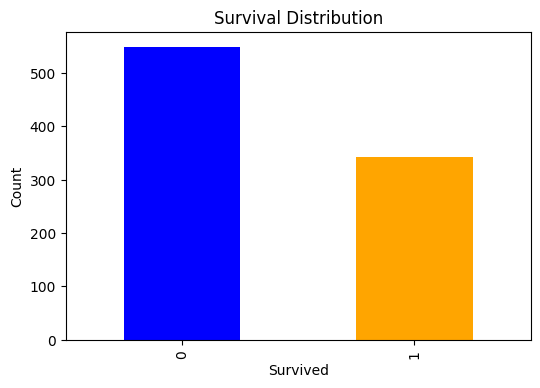

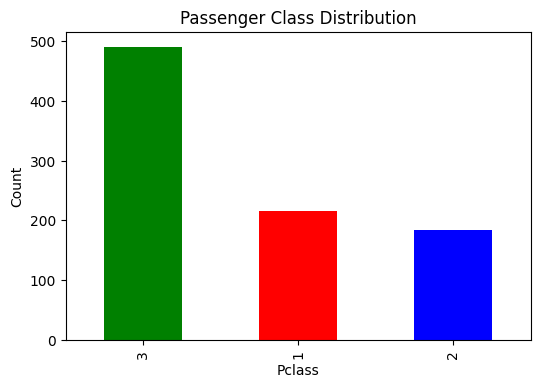

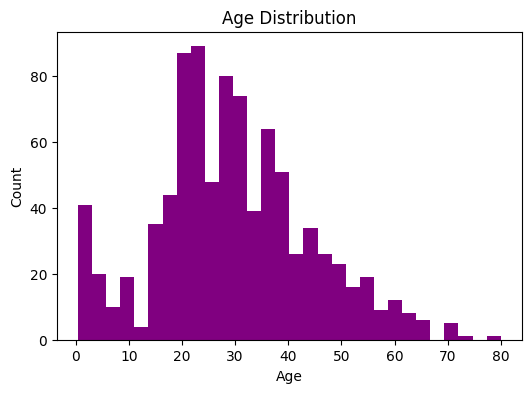

Accuracy: 0.81
Confusion Matrix:
[[92 13]
 [21 53]]


In [23]:
# main.py

# from data.load_data import load_data, split_data
# from analysis.exploratory_analysis import plot_survival_distribution, plot_pclass_distribution, plot_age_distribution
# from models.model import build_and_train_model, evaluate_model

# Load dataset
data_filepath = 'data/train.csv'
df = load_data(data_filepath)

# Perform Exploratory Data Analysis (EDA)
plot_survival_distribution(df)
plot_pclass_distribution(df)
plot_age_distribution(df)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = split_data(df)

# Build and train the model
model = build_and_train_model(X_train, y_train)

# Evaluate the model
evaluate_model(model, X_test, y_test)
